# Target Model Training and Analysis


### This notebook demonstrates the process of:







In [1]:
# 0. Importing Libraries 
# ==========================
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

2025-02-15 23:49:45.338157: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 23:49:45.492089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739663385.546401  123487 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739663385.572263  123487 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 23:49:45.797950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### 1. Dataset analysis and visualization

Loading MNIST dataset...

Dataset Information:
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of training examples: 60000
Number of test examples: 10000


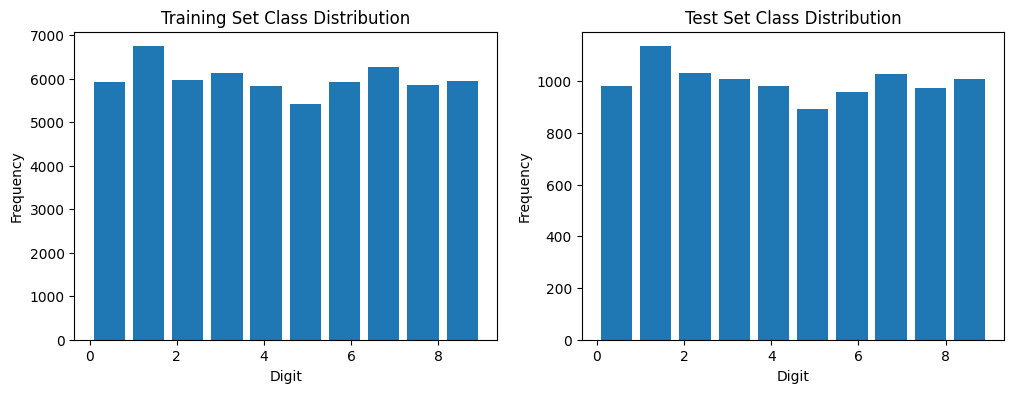

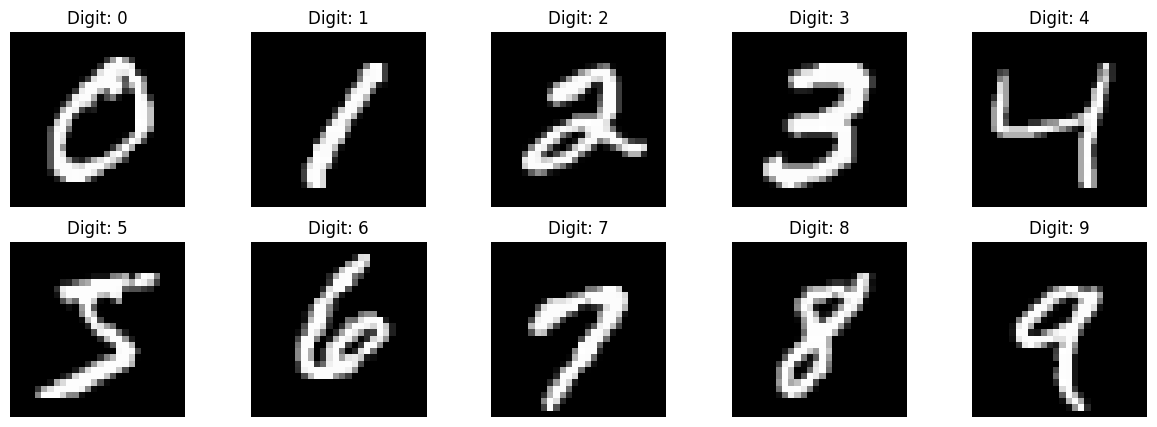

Text(0, 0.5, 'Frequency')

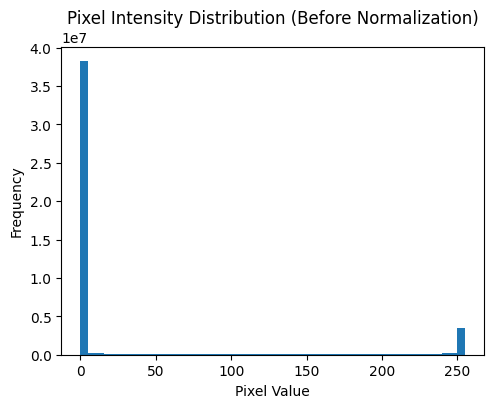

In [2]:
# 1. Load and Analyze Dataset
# ==========================

# Load MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Basic dataset information
print("\nDataset Information:")
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Number of training examples: {len(x_train)}")
print(f"Number of test examples: {len(x_test)}")

# Class distribution analysis
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=10, rwidth=0.8)
plt.title('Training Set Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=10, rwidth=0.8)
plt.title('Test Set Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

# Sample image visualization
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    plt.title(f'Digit: {i}')
    plt.axis('off')
plt.show()

# Pixel intensity distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x_train.ravel(), bins=50)
plt.title('Pixel Intensity Distribution (Before Normalization)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


### 2. Data preprocessing

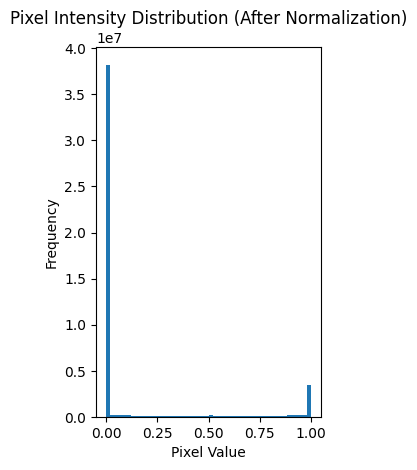

In [3]:
# 2. Data Preprocessing
# ====================

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

plt.subplot(1, 2, 2)
plt.hist(x_train.ravel(), bins=50)
plt.title('Pixel Intensity Distribution (After Normalization)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


### 3. Model architecture design

In [4]:
# 3. Model Architecture
# ====================

def create_model():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        
        # Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile model
model = create_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Model summary
print("\nModel Architecture:")
model.summary()

/home/cybok/Desktop/cybok/cybokenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-15 23:49:53.698011: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,042 (515.79 KB)

 Trainable params: 131,466 (513.54 KB)

 Non-trainable params: 576 (2.25 KB)

### 4. Model training and evaluation

In [5]:
# 4. Model Training
# ================

# Callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2
    )
]

# Train model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.7627 - loss: 0.8015 - val_accuracy: 0.6491 - val_loss: 1.0074 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.9635 - loss: 0.1187 - val_accuracy: 0.9863 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.9747 - loss: 0.0846 - val_accuracy: 0.9854 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9770 - loss: 0.0707 - val_accuracy: 0.9903 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9830 - loss: 0.0557 - val_accuracy: 0.9899 - val_loss: 0.0342 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9902 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9863 - l

### 5. Advanced performance analysis

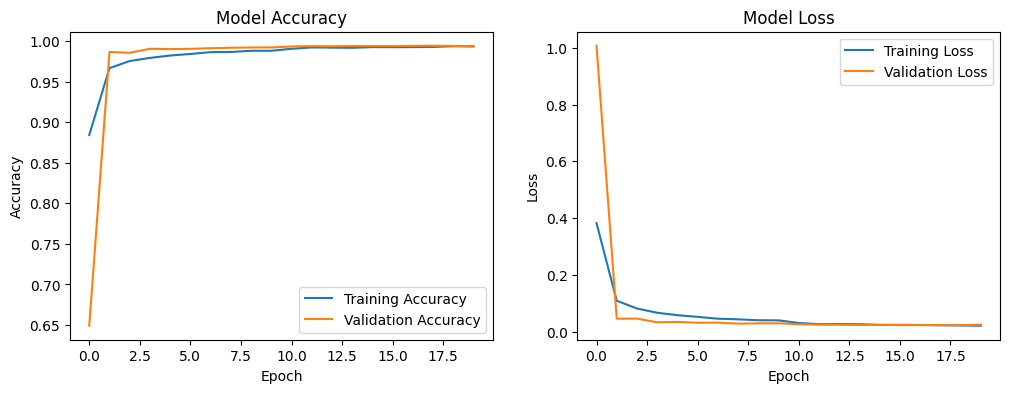


Evaluating model on test set...
Test accuracy: 0.9952
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


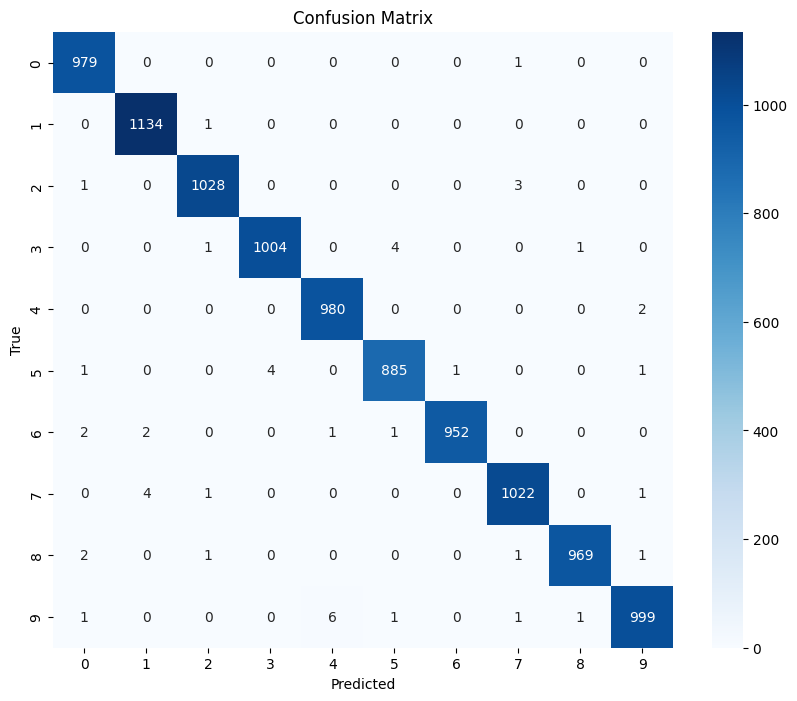


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



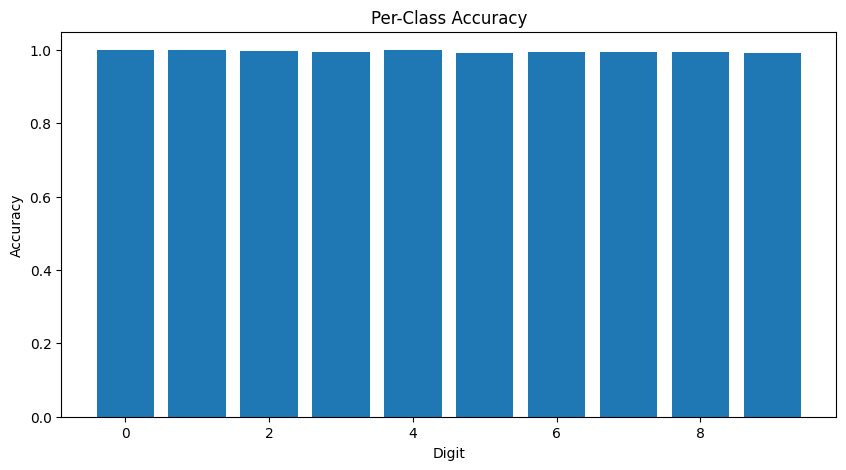

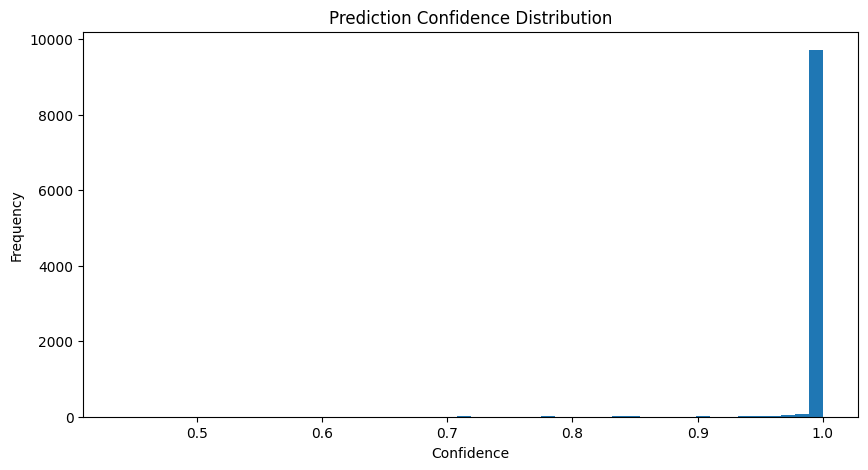

In [6]:
# 5. Performance Analysis
# ======================

# Training history visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model evaluation
print("\nEvaluating model on test set...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Per-class accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 5))
plt.bar(range(10), per_class_acc)
plt.title('Per-Class Accuracy')
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.show()

# Prediction confidence analysis
pred_confidences = np.max(y_pred, axis=1)
plt.figure(figsize=(10, 5))
plt.hist(pred_confidences, bins=50)
plt.title('Prediction Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()


### 6. Saving the Model

In [7]:
# 6. Save Model and Metadata
# =========================

# Save model
model.save('target_mnist_model.keras')
print("\nModel saved as 'target_mnist_model.keras'")

# Save model metadata
metadata = {
    'architecture': model.get_config(),
    'test_accuracy': test_acc,
    'per_class_accuracy': per_class_acc.tolist(),
    'training_history': history.history
}

import json
with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f)
print("Model metadata saved as 'model_metadata.json'")

# Save example test data for later comparison
np.save('test_examples.npy', x_test[:1000])
np.save('test_labels.npy', y_test[:1000])
print("Test examples saved for later comparison")


Model saved as 'target_mnist_model.keras'
Model metadata saved as 'model_metadata.json'
Test examples saved for later comparison


### 7. Additional Model Testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

✅ Target Model Accuracy: 0.9952


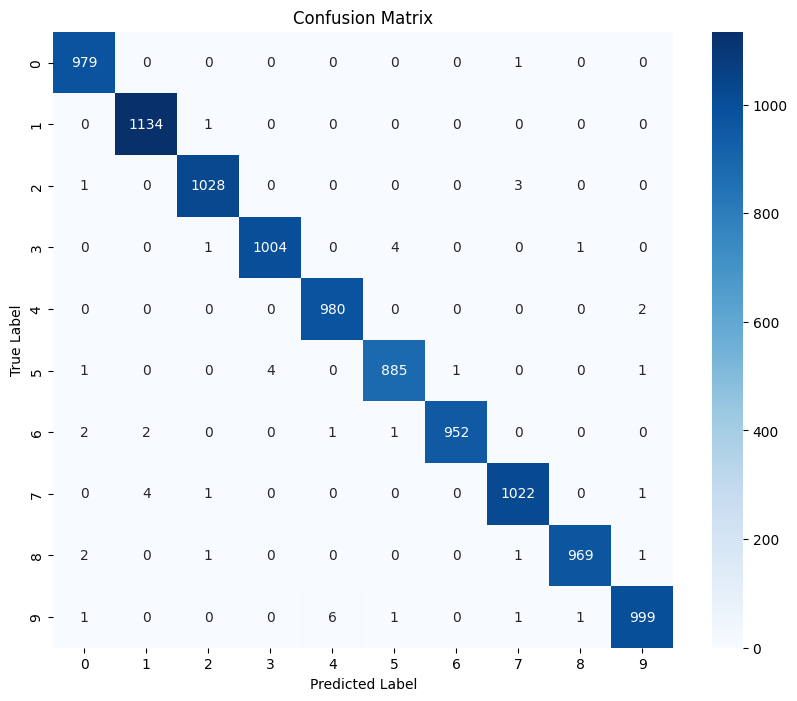


📜 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



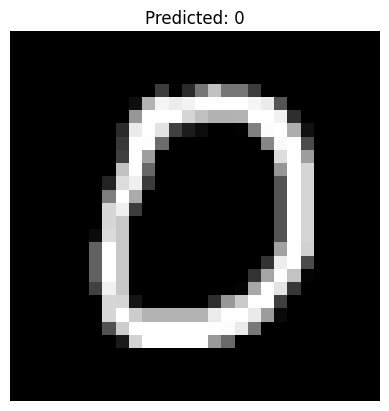

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🎯 Step 1: Generate Predictions from Target Model
test_target_preds = model.predict(x_test)  # Ensure 'model' is defined

# 🎯 Step 2: Convert Predictions to Class Labels
target_test_preds = np.argmax(test_target_preds, axis=1)

# 🎯 Step 3: Print Accuracy
accuracy = accuracy_score(y_test, target_test_preds)
print(f"\n✅ Target Model Accuracy: {accuracy:.4f}")

# 🎯 Step 4: Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, target_test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🎯 Step 5: Classification Report
print("\n📜 Classification Report:")
print(classification_report(y_test, target_test_preds))

# 🎯 Step 6: Test Individual Samples
def test_custom_sample(model, x_sample):
    pred_probs = model.predict(x_sample.reshape(1, 28, 28, 1), verbose=0)
    pred_class = np.argmax(pred_probs)
    
    plt.imshow(x_sample.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred_class}")
    plt.axis('off')
    plt.show()

# Example: Test on sample #10
test_custom_sample(model, x_test[10])
